In [ ]:
#Integrantes: Vicente Moreno, Nicolás Rodriguez, Alejandro Salas, Joaquín Ramirez.#Bloque para importar librerias y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1.Definición del Problema

##Introducción al problema

En el año 2912 se lanza el "Spaceship Titanic", una nave interestelar con casi 13.000 pasajeros, cuyo objetivo es llevar gente desde nuestro sistema solar a exoplanetas recientemente descubiertos que orbitan estrellas vecinas.

Mientras que la nave rondaba Alpha Centauri en ruta a su primer destino, colisionó con una anomalía espacio-temporal, generando así que se encuentre con un destino similar al navío que inspiró su nombre de hace 1.000 años atras.

Aunque en esta ocasión la nave salió casi intacta del accidente, casi la mitad de los pasajeros fueron transportados a una dimensión alterna.

Bajo esta premisa se nos pide realizar un analisis de los datos encontrados en la nave para saber si se hubo una relación entre los pasajeros que fueron transportados, y así evitar que suceda otro accidente de este estilo, y entrenar un modelo que sea capaz de predecir si un pasajero será transportado o no basandose en información disponible de él.

## Dataset

Se nos hace entrega de dos conjuntos de datos, uno que contiene la información de alrededor de dos tercios de los pasajeros (\~8700) y si fueron o no transportados, y un segundo conjunto que contiene la información restante (\~4300) pero sin el conocimiento de si fueron o no transportados.

El primer conjunto, llamado "train.csv" tiene las siguientes columnas:

* -PassengerId: Identificador unico de cada pasajero, con formato gggg_pp, donde "gggg" corresponde al grupo del pasajero y "pp" es su numero dentro del grupo.

* -HomePlanet: El planeta de donde proviene el pasajero. Normalmente su planeta de residencia permanente.

* -CryoSleep: Indica si el pasajero es elegido para ser puesto en animación suspendida durante el viaje. Estos pasajeros están confinados a su cabina.

* -Cabin: El numero de la cabina donde se está quedando el pasajero. Tiene formato "deck/num/side", donde "side" puede ser "P" para "puerto" o "S" para "Starboard".

* -Destination: El planeta donde el pasajero desembarcará
* -Age: La edad del pasajero.

* -VIP: Indica si el pasajero pagó por un servicio especial VIP durante el viaje.

* -RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: La cantidad de dinero que ha gastado en cada uno de los servicios el pasajero.

* -Name: El primer y último nombre del pasajero.

* -Transported: Indica si el pasajero fué transportado a otra dimensión (Esta es la columna que intentaremos predecir).

El segundo conjunto de datos, llamado "test.csv" consiste de los las mismas columnas exceptuando la columna "Transported".








# 2. Estadística Descriptiva

In [ ]:
#Importar los datos del dataset train
df = pd.read_csv('train.csv')
#Visualizacion inicial de los datos
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
#Estadisticas de las variables numericas
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.shape

(8693, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

# 3.Visualización Descriptiva

<Axes: ylabel='Transported'>

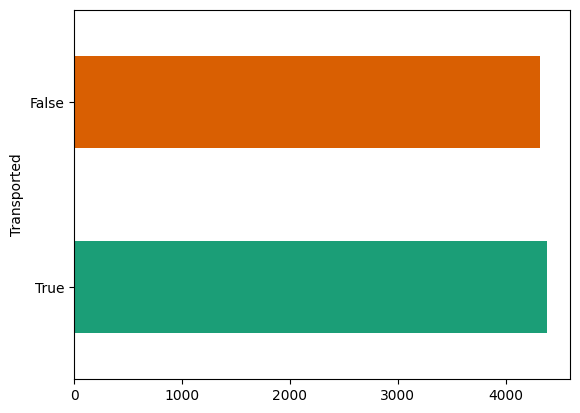

In [ ]:
#Grafico de gente transportada
df['Transported'].value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

Podemos notar que, tal y como se nos indico la descripcion del problema, alrededor de la mitad de la gente fue teletransportada

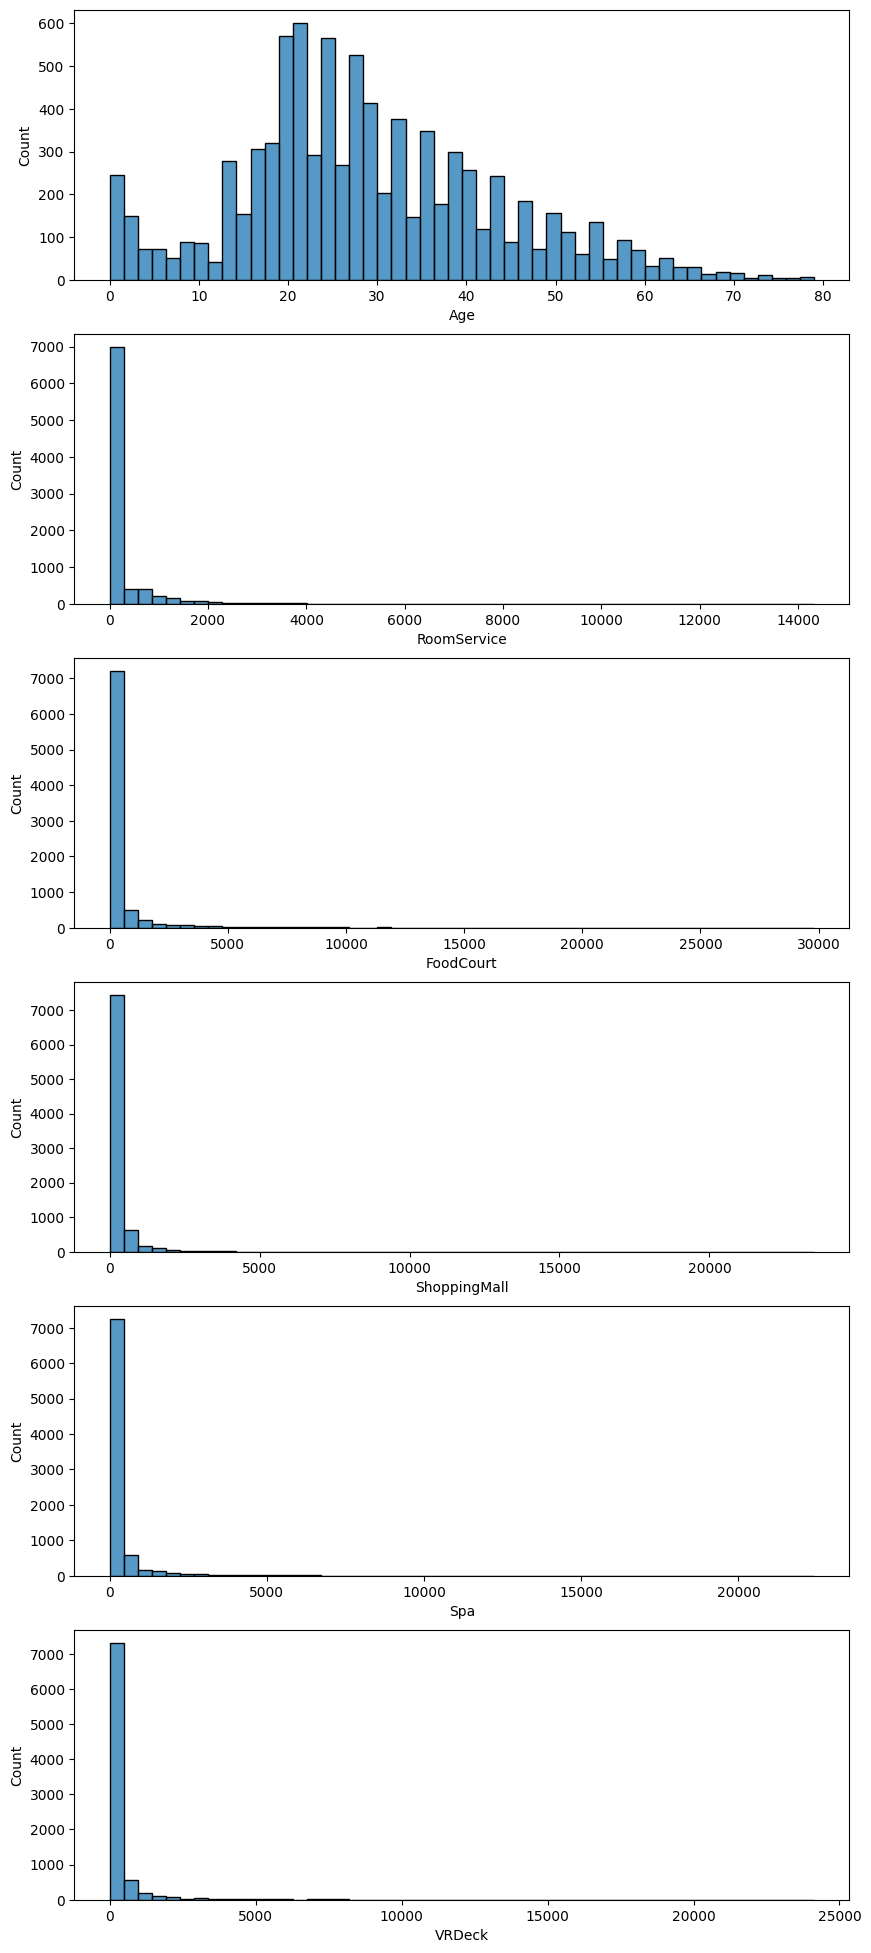

In [ ]:
#Grafico de las distribuciones de las variables numericas
col_num = df.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(len(col_num), 1, figsize=(10, 10))
plt.subplots_adjust(top=2)
col_num = df.select_dtypes(include=[np.number]).columns.tolist()

for i in range(len(col_num)):
  sns.histplot(df[col_num[i]].dropna(),ax=ax[i],bins=50)

Aquí podemos ver que la mayor parte de la gente gastó cantidades bajas en los servicios que ofrecía el crusero. Esto puede ser debido a que el accidente sucedió antes de alcanzar el primer destino, es decir, hubo poco tiempo para generar gastos significativos.

<Axes: ylabel='HomePlanet'>

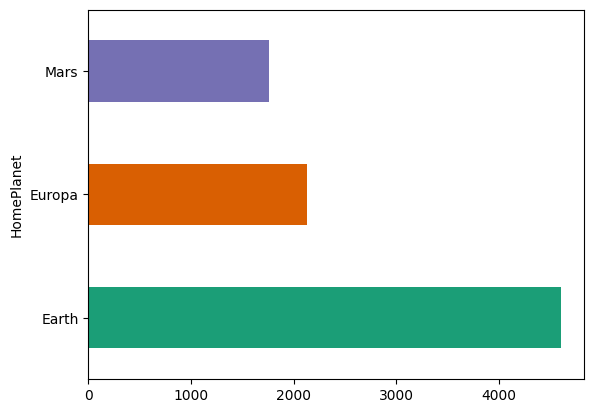

In [ ]:
#Distribucion de la gente segun su planeta de origen
df.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

Podemos notar que la mayor parte de la gente viene desde el planeta tierra (cercano a la mitad del grupo), y que el resto esta distribuido cercano a 1/4 desde Marte y 1/4 desde Europa, con Europa mostrando un poco más de gente.

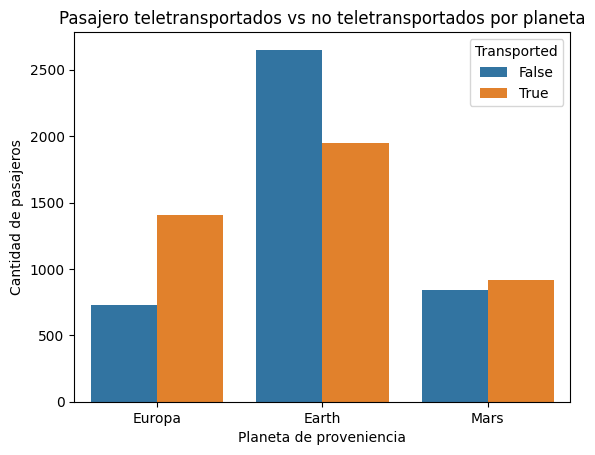

In [ ]:
#Grafico de la gente transportada por planeta
sns.countplot(data=df, x='HomePlanet', hue='Transported')
plt.title('Pasajero teletransportados vs no teletransportados por planeta')
plt.xlabel('Planeta de proveniencia')
plt.ylabel('Cantidad de pasajeros')
plt.show()

Aquí podemos ver que la gente de la Tierra tiene una tendencia a no ser teletransportado, mientras que la gente de Europa parece tener una tendencia a ser teletransportado y la gente de Marte no tiene una tendencia clara

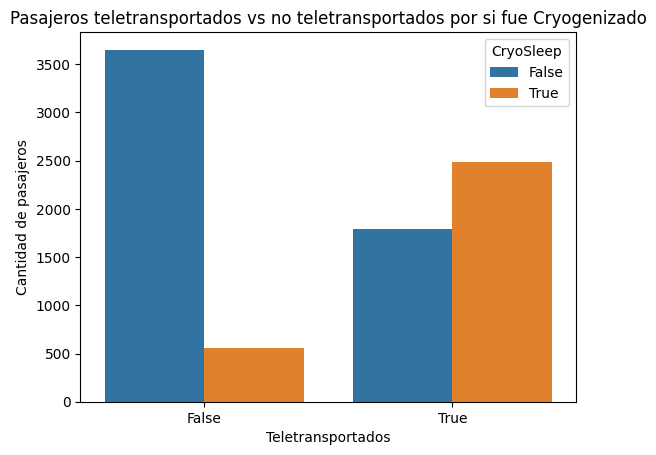

In [ ]:
#Cantidad de gente teletransportada en base a si fue criogenizada o no
sns.countplot(data=df, x='Transported', hue='CryoSleep')
plt.title('Pasajeros teletransportados vs no teletransportados por si fue Cryogenizado')
plt.xlabel('Teletransportados')
plt.ylabel('Cantidad de pasajeros')
plt.show()

Notemos que aparentemente, al estar en estado de Cryosueño aumenta la probabilidad de ser teletransportado.

Veamos cuanto influye la cantidad de dinero gastado y cual de todos los servicios tuvo mayor impacto

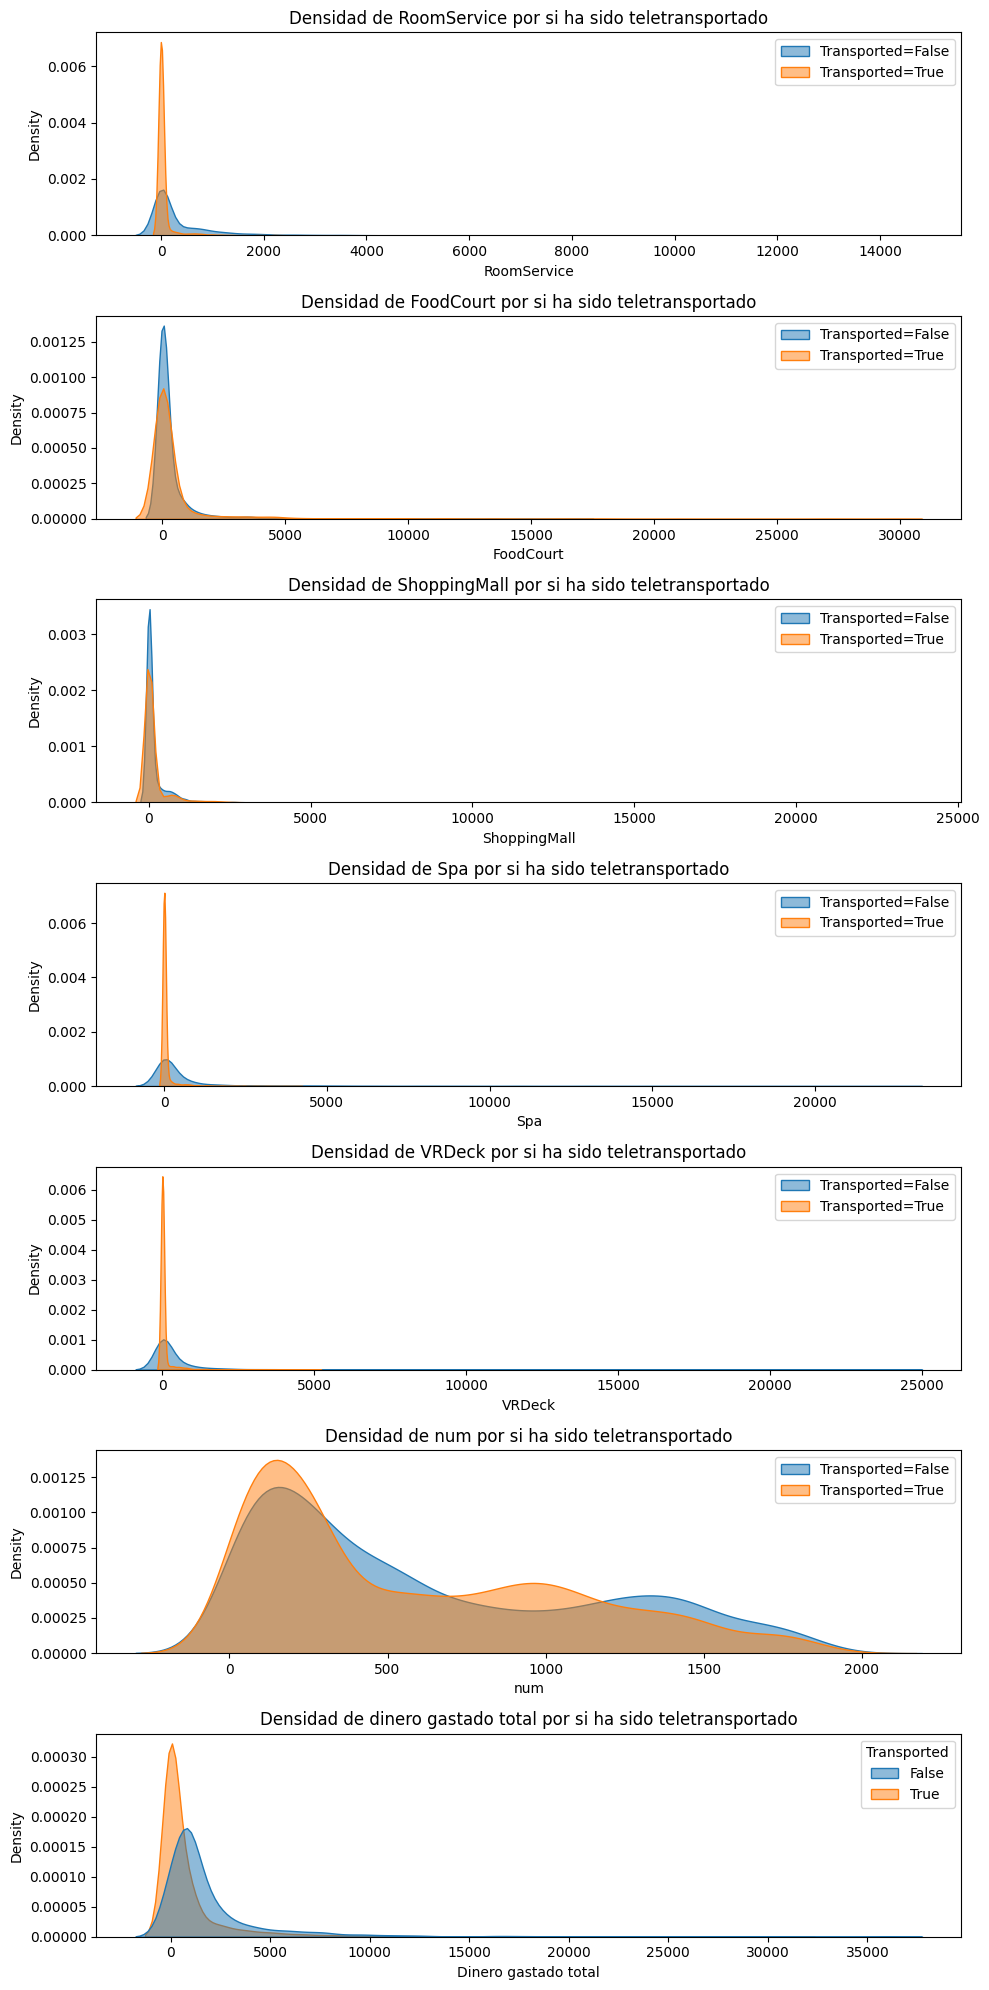

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Age')

fig, axes = plt.subplots(len(numerical_features)+1, 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    for transported_status in df['Transported'].unique():
        subset = df[df['Transported'] == transported_status]
        sns.kdeplot(
            data=subset,
            x=feature,
            ax=axes[i],
            label=f'Transported={transported_status}',
            fill=True,
            alpha=0.5,
        )
    axes[i].set_title(f'Densidad de {feature} por si ha sido teletransportado')
    axes[i].legend()
sns.kdeplot(
    x=df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1),
    hue=df['Transported'],
    fill=True,
    alpha=0.5
)
plt.title('Densidad de dinero gastado total por si ha sido teletransportado')
plt.xlabel('Dinero gastado total')

plt.tight_layout()
plt.show()

En todos los casos vemos que hay un superposicion de densidades de gente la transportada y la que no. Por tanto, como las distribuciones de densidades se asemejan, podemos inferir que el gastar dinero o no, no tiene correlacion con el ser transportado.

Ahora hagamos lo propio con el resto de caracteristicas.

<ipython-input-24-76635e725324>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


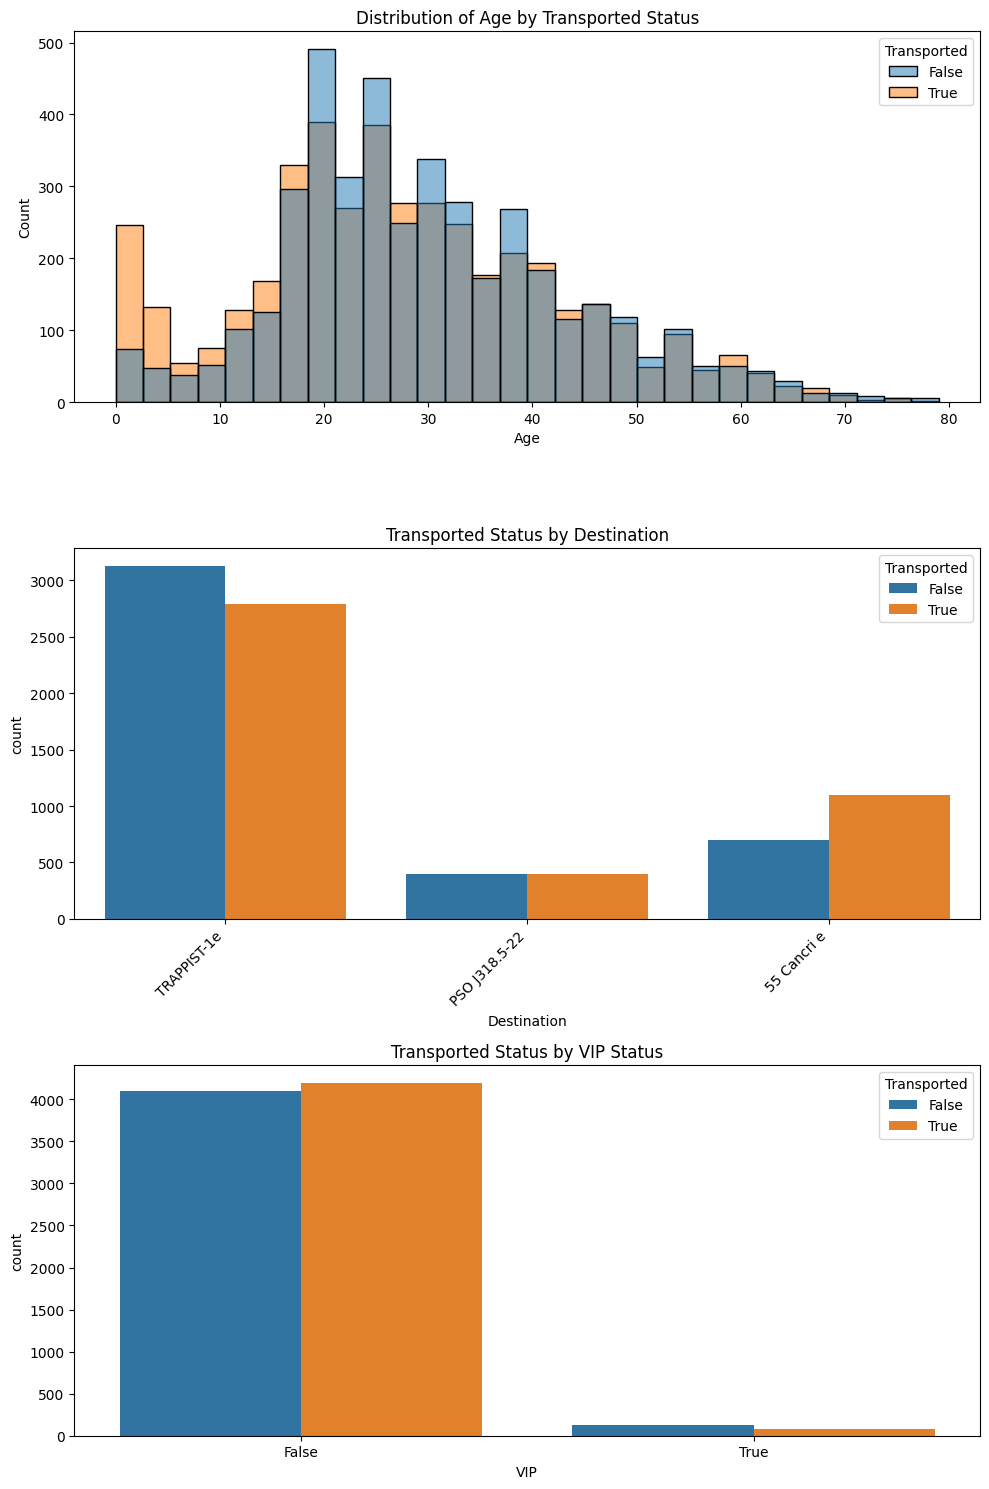

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=df, x='Age', hue='Transported', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Age by Transported Status')

sns.countplot(data=df, x='Destination', hue='Transported', ax=axes[1])
axes[1].set_title('Transported Status by Destination')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=df, x='VIP', hue='Transported', ax=axes[2])
axes[2].set_title('Transported Status by VIP Status')

plt.tight_layout()
plt.show()

Al igual que el caso anterior, a priori, se evidencia que no existe relacion alguna con la edad, el lugar de destino y si el pasajero pago el VIP o no. Esto ultimo se condice con lo se vio anteriormente.

Parece ser que las unicas caracteristicas relevantes son haber estado criogenizado y su planeta de origen

In [ ]:
#Pairplot para estudiar correlaciones
sns.pairplot(df, hue='Transported')

Aqui podemos notar que en general, no se ven clases separables

#4.Preprocesamiento

Primero, notemos que las columnas que referencian el id y el nombre del pasajero son inutiles al momento de entrenar, asi que las quitaremos

In [ ]:
#Dropear las columnas id y nombre
df.drop(['PassengerId','Name'], axis=1, inplace=True)

Veamos tambien que la columna Cabin nos es inutil en su estado actual, asi que la desglosaremos.

In [ ]:
#Desglosar la columna cabin
df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)
df['num']=df['num'].astype(float)
#Eliminar la columna obsoleta
df.drop('Cabin', axis=1, inplace=True)

Ahora veamos la integridad de los datos

In [ ]:
#Chequeos generales de integridad de los datos
print(f'Los porcentajes de datos faltantes son: \n {df.isnull().sum()/df.shape[0]*100}')
print(f'Hay: {df.shape[0]} registros en el dataset')
print(f'Hay {df.duplicated().sum()} datos duplicados')


Los porcentajes de datos faltantes son: 
 HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
deck            2.289198
num             2.289198
side            2.289198
dtype: float64
Hay: 8693 registros en el dataset
Hay 15 datos duplicados


En vista de que todos se ven como pórcentajes ligeramente distintos, podemos notar que potencialmente se podría perder ~25% del dataset. Por ello llevaremos a cabo distintos metodos de rellenar datos para cada tipo de variable.

Para las variables categoricas, llenaremos los nulos con la categoria 'otros'

Las variables numericas tienen una desviacion estandar bastante alta con respecto a su media, asi que utilizaremos la mediana como dato para rellenar los nulos. Para hacer esto y evitar que se filtre informacion separaremos los datos primero

Finalmente los booleanos los rellenaremos con Falsos.


Además, eliminaremos los datos repetidos

In [ ]:
#Eliminar registros repetidos.
df.drop_duplicates(inplace=True)
#Rellenar los vacios de las categoricas con la categoria 'other' y las booleanas con 'False'
df['HomePlanet'] = df['HomePlanet'].fillna('other')
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['Destination'] = df['Destination'].fillna('other')
df['VIP'] = df['VIP'].fillna(False)
df['deck'] = df['deck'].fillna('other')
df['side'] = df['side'].fillna('other')
#Separar en conjuntos de entrenamiento y de evaluacion
X_train, X_eval, y_train, y_eval = train_test_split(df.drop('Transported', axis=1), df['Transported'], test_size=0.2, random_state=23)
#Rellenar los vacios de las numericas con la mediana correspondiente
#Rellenar conjunto X_eval
X_eval['Age'] = X_eval['Age'].fillna(X_train['Age'].median())
X_eval['RoomService'] = X_eval['RoomService'].fillna(X_train['RoomService'].median())
X_eval['FoodCourt'] = X_eval['FoodCourt'].fillna(X_train['FoodCourt'].median())
X_eval['ShoppingMall'] = X_eval['ShoppingMall'].fillna(X_train['ShoppingMall'].median())
X_eval['Spa'] = X_eval['Spa'].fillna(X_train['Spa'].median())
X_eval['VRDeck'] = X_eval['VRDeck'].fillna(X_train['VRDeck'].median())
X_eval['num'] = X_eval['num'].fillna(X_train['num'].median())
#Rellenar conjunto X_train
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_train['RoomService'] = X_train['RoomService'].fillna(X_train['RoomService'].median())
X_train['FoodCourt'] = X_train['FoodCourt'].fillna(X_train['FoodCourt'].median())
X_train['ShoppingMall'] = X_train['ShoppingMall'].fillna(X_train['ShoppingMall'].median())
X_train['Spa'] = X_train['Spa'].fillna(X_train['Spa'].median())
X_train['VRDeck']= X_train['VRDeck'].fillna(X_train['VRDeck'].median())
X_train['num'] = X_train['num'].fillna(X_train['num'].median())


<ipython-input-37-e6583e318ac5>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(False)
<ipython-input-37-e6583e318ac5>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False)


Ahora transformaremos las variables booleanas en 1 para true y 0 para false, y las categóricas en números.

Para transformar las categóricas en números usaremos una técnica que consiste en asignarle a cada categoría el promedio de la variable objetivo.

In [ ]:
#Booleanos a 1 y 0
X_train['CryoSleep'] = X_train['CryoSleep'].astype(int)
X_train['VIP'] = X_train['VIP'].astype(int)
X_eval['CryoSleep'] = X_eval['CryoSleep'].astype(int)
X_eval['VIP'] = X_eval['VIP'].astype(int)
#Categoricos por media
categoricas = ['HomePlanet','Destination','deck','side']
medias = {}
for categorica in categoricas:
  promedio_categorica = X_train.join(y_train).groupby(categorica)['Transported'].mean()
  medias[categorica] = promedio_categorica
  X_train[categorica] = X_train[categorica].map(promedio_categorica)
  X_eval[categorica] = X_eval[categorica].map(promedio_categorica)

De la parte 3, sospechamos que existen features que no aportan informacion al modelo. Para verificar esto, entrenaremos dos conjuntos de datos. Uno sin estas features y otro con todas

In [ ]:
col = ['VIP', 'Age', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train_sin=X_train.drop(col, axis=1)
X_eval_sin=X_eval.drop(col, axis=1)

,HomePlanet,CryoSleep,deck,num,side
8140,0.654846,1,0.688333,326.0,0.547341
4246,0.423784,0,0.519455,739.0,0.454221
1526,0.423784,0,0.435817,308.0,0.547341
7326,0.423784,0,0.435817,1500.0,0.547341
438,0.500000,1,0.435817,86.0,0.547341


Ahora estandaricemos los datos

In [ ]:
#Estandarizar
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_eval_std = scaler.transform(X_eval)
X_train_sin_std = scaler.fit_transform(X_train_sin)
X_eval_sin_std = scaler.transform(X_eval_sin)


#5.Selección de modelo y métricas

Estudiemos si es pertinente una reduccion de dimension o no

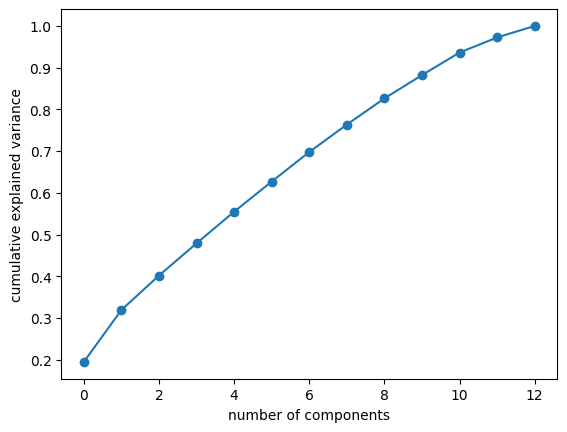

In [ ]:
pca= PCA()
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker= 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

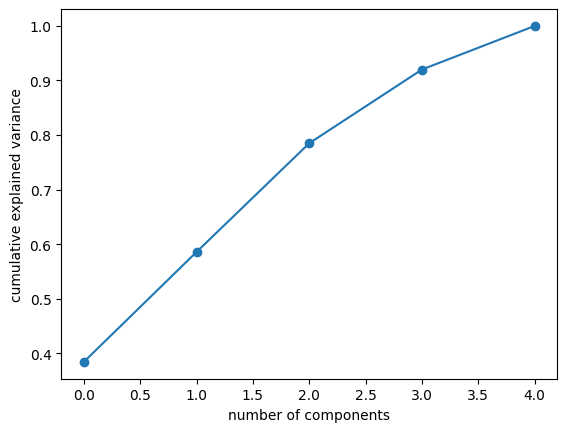

In [ ]:
pca= PCA()
pca.fit(X_train_sin_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker= 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Notemos que para obtener una varianza mayor al 90% son necesarias casi todas las componentes. Por tanto, se conservaran todas.

Pära evitar el overfitting haremos verificacion cruzada de modelos para asi determinar el mejor de todos

In [ ]:

modelos = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = {'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision'}

resultados = []
resultados_sin = []

for nombre, modelo in modelos.items():
    scores = cross_validate(modelo, X_train_std, y_train, cv=skf, scoring=scoring)
    resultados.append({
        'Modelo': nombre,
        'Accuracy': scores['test_accuracy'].mean(),
        'F1 Score': scores['test_f1'].mean(),
        'Precision': scores['test_precision'].mean(),
    })
    scores_sin = cross_validate(modelo, X_train_sin_std, y_train, cv=skf, scoring=scoring)
    resultados_sin.append({
        'Modelo': nombre,
        'Accuracy': scores_sin['test_accuracy'].mean(),
        'F1 Score': scores_sin['test_f1'].mean(),
        'Precision': scores_sin['test_precision'].mean(),
    })

resultados_df = pd.DataFrame(resultados)
resultados_sin_df = pd.DataFrame(resultados_sin)

print("Con todas las features:")
print(resultados_df)
print("\nSin algunas features:")
print(resultados_sin_df)

Con todas las features:
                Modelo  Accuracy  F1 Score  Precision
0  Logistic Regression  0.793434  0.798120   0.782640
1        Decision Tree  0.739844  0.740691   0.740941
2        Random Forest  0.799625  0.793410   0.821804
3                  SVM  0.799339  0.802537   0.792781

Sin algunas features:
                Modelo  Accuracy  F1 Score  Precision
0  Logistic Regression  0.725296  0.694047   0.786025
1        Decision Tree  0.660328  0.656218   0.666657
2        Random Forest  0.669115  0.668066   0.672357
3                  SVM  0.725007  0.694762   0.783634


Es claro que las features que pensabamos que no afectan, si lo hacen, pues hya una clara baja en la exactitud. Veamos que pasa si agregamos algunas. En este caso se escogera VIP y Destination. El primero, por que creemos que resume la cantidad de dinero de la persona.



In [ ]:
col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train_con=X_train.drop(col, axis=1)
X_eval_con=X_eval.drop(col, axis=1)
#reesacalado
X_train_con_std = scaler.fit_transform(X_train_con)
X_eval_con_std = scaler.transform(X_eval_con)

In [ ]:
#Volvemos a hacer cross validation
resultados_con = []
for nombre, modelo in modelos.items():
    scores = cross_validate(modelo, X_train_con_std, y_train, cv=skf, scoring=scoring)
    resultados_con.append({
        'Modelo': nombre,
        'Accuracy': scores['test_accuracy'].mean(),
        'F1 Score': scores['test_f1'].mean(),
        'Precision': scores['test_precision'].mean(),
    })
resultados_con_df = pd.DataFrame(resultados_con)
print("Con algunas features:")
print(resultados_con_df)

Con algunas features:
                Modelo  Accuracy  F1 Score  Precision
0  Logistic Regression  0.714492  0.689034   0.759670
1        Decision Tree  0.656724  0.654886   0.660380
2        Random Forest  0.663495  0.663012   0.665669
3                  SVM  0.725152  0.693466   0.786882


En definitiva, parece ser que todas las features son importantes, mas aun, las de gastos dentro de la nave. Notemos que esto no se condice con lo que concluimos mas arriba.
Por esto mismo, se decidira continuar con el df completo y entrenar RandomForest, ya que, fue el modelo con mayor exactitud.

In [ ]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(modelos['Random Forest'], param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_std, y_train)
print('Mejores hiperparametros', grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparametros {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
grid_search.best_estimator_.fit(X_train_std, y_train)
y_pred = grid_search.best_estimator_.predict(X_eval_std)
print('Accuracy:', accuracy_score(y_eval, y_pred))
print('F1 Score:', f1_score(y_eval, y_pred))
print('Precision:', precision_score(y_eval, y_pred))

Accuracy: 0.8058755760368663
F1 Score: 0.8124652198107958
Precision: 0.7978142076502732


#6.Visualizaciones del Modelo

In [ ]:
#df de las predicciones del modelo
df_pred = X_eval.copy()
df_pred['Transported'] = y_pred
#Transformar las categoricas de vuelta a sus valores originales
for categorica in categoricas:
  for categoria in medias[categorica].index:
    df_pred[categorica] = df_pred[categorica].replace(medias[categorica][categoria], categoria)
#df de la informacion para evaluacion
df_eval = X_eval.join(y_eval)
#Transformar las categoricas de vuelta a sus valores originales
for categorica in categoricas:
  for categoria in medias[categorica].index:
    df_eval[categorica] = df_eval[categorica].replace(medias[categorica][categoria], categoria)


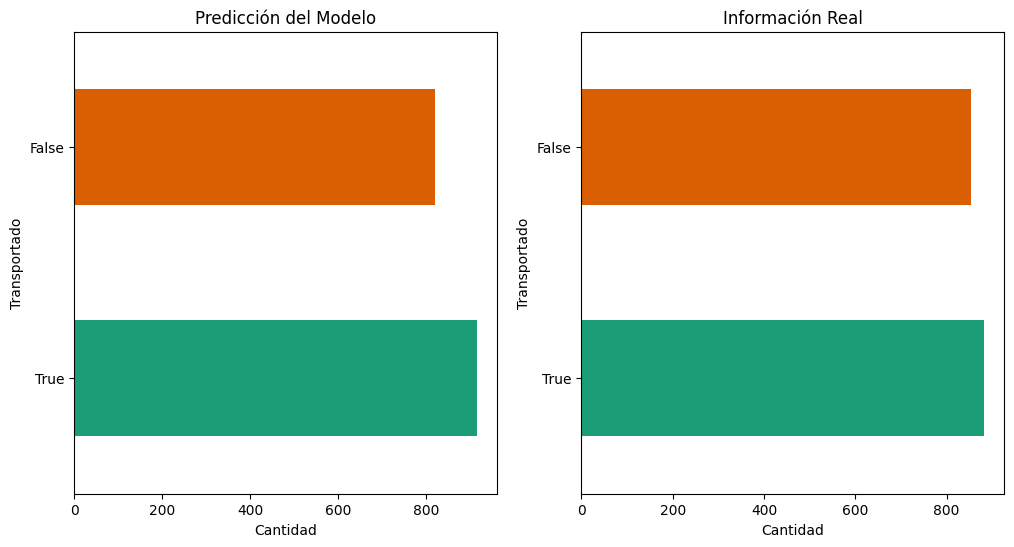

In [ ]:
#Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Cantidad de gente transportada según el modelo
df_pred['Transported'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[0])
axs[0].set_title('Predicción del Modelo')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Transportado')

#Cantidad de gente transportada según la información real
df_eval['Transported'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[1])
axs[1].set_title('Información Real')
axs[1].set_xlabel('Cantidad')
axs[1].set_ylabel('Transportado')

plt.show()

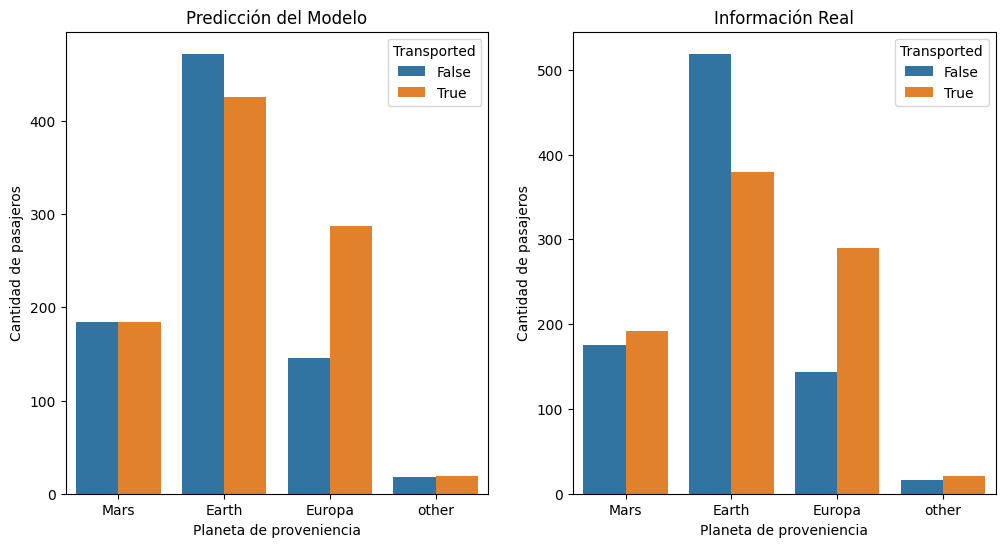

In [ ]:
#Graficos de la gente transportada por planeta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#Predichos por el modelo
sns.countplot(data=df_pred, x='HomePlanet', hue='Transported', ax=axs[0])
axs[0].set_title('Predicción del Modelo')
axs[0].set_xlabel('Planeta de proveniencia')
axs[0].set_ylabel('Cantidad de pasajeros')
#Datos reales
sns.countplot(data=df_eval, x='HomePlanet', hue='Transported', ax=axs[1])
axs[1].set_title('Información Real')
axs[1].set_xlabel('Planeta de proveniencia')
axs[1].set_ylabel('Cantidad de pasajeros')
plt.show()

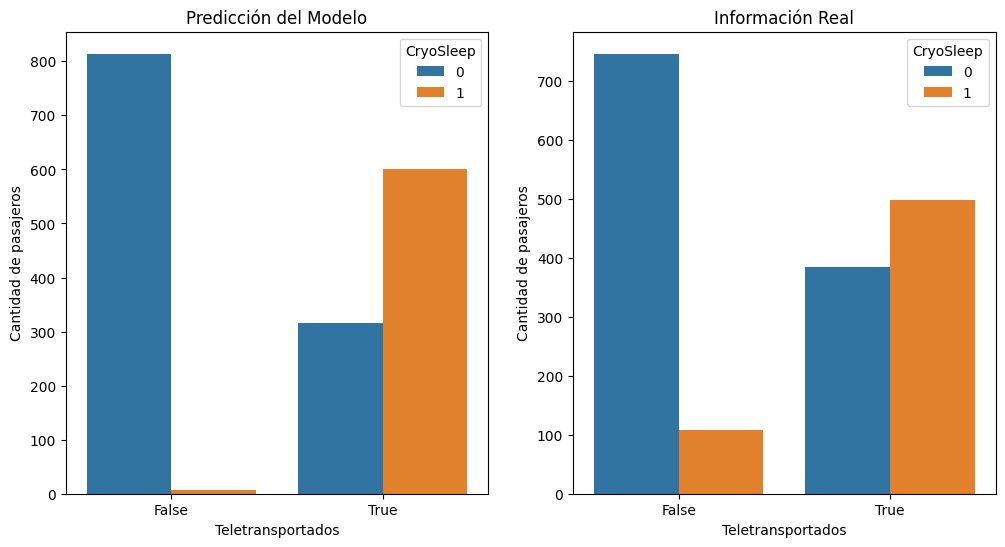

In [ ]:
#Cantidad de gente teletransportada en base a si fue criogenizada o no
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#Predichos por el modelo
sns.countplot(data=df_pred, x='Transported', hue='CryoSleep', ax=axs[0])
axs[0].set_title('Predicción del Modelo')
axs[0].set_xlabel('Teletransportados')
axs[0].set_ylabel('Cantidad de pasajeros')
#Datos reales
sns.countplot(data=df_eval, x='Transported', hue='CryoSleep', ax=axs[1])
axs[1].set_title('Información Real')
axs[1].set_xlabel('Teletransportados')
axs[1].set_ylabel('Cantidad de pasajeros')
plt.show()

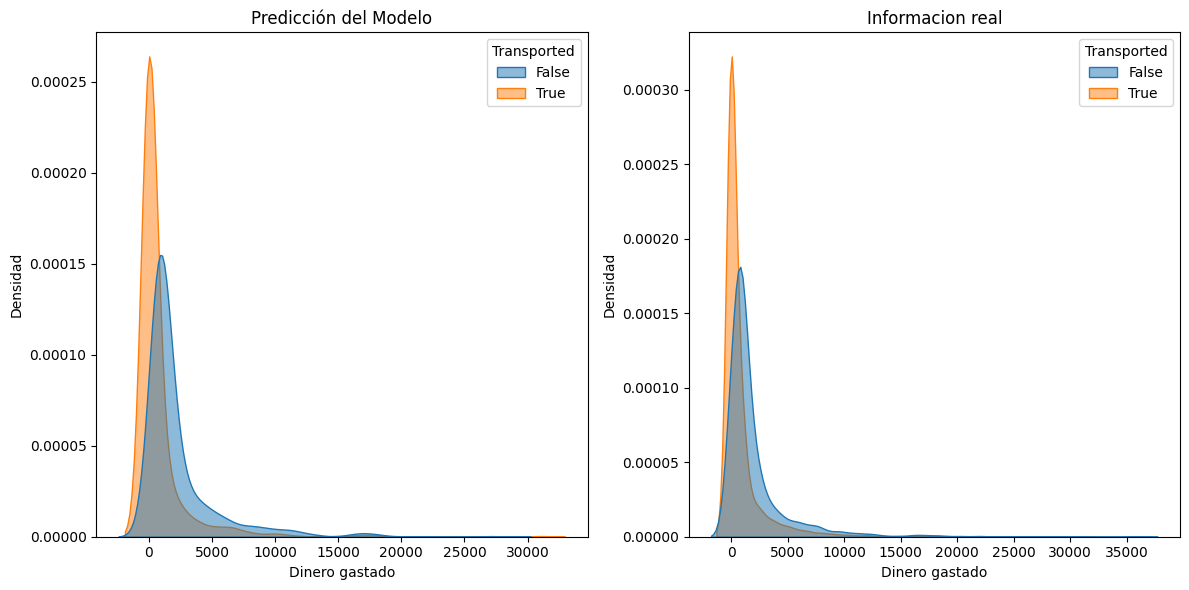

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(
    x=df_pred[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1),
    hue=df_pred['Transported'],
    fill=True,
    alpha=0.5,
    ax=axs[0]
)
axs[0].set_title('Predicción del Modelo')
axs[0].set_xlabel('Dinero gastado')
axs[0].set_ylabel('Densidad')
sns.kdeplot(
    x=df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1),
    hue=df['Transported'],
    fill=True,
    alpha=0.5,
    ax=axs[1]
)
axs[1].set_title('Informacion real')
axs[1].set_xlabel('Dinero gastado')
axs[1].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

#7. Conclusiones

Segun lo observado en los graficos de la informacion completa, el viajar criogenizado aumenta la probabilidad de ser teletransportado. Además, por algún motivo, el vivir en la tierra disminuye la probabilidad de ser teletransportado, mientras que vivir en Europa la aumenta.
Por otro lado, resulto no ser cierto que habian features que no aportaban informacion a la hora de predecir.
Con todo esto en mente, se entrenaron modelos de aprendizaje automático para intentar predecir si alguien sería teletransportado a una dimensión paralela o no. Los mejores resultados de precisión fueron conseguidos con el modelo "Random Forest Classifier" con los hiperparámetros:
* -max_depth: 10
* -max_features: sqrt
* -min_samples_leaf: 2
* -min_samples_split: 10
* -n_estimators: 100

El puntaje obtenido fue de 80,7% de accuracy.

Finalmente, si usted va a viajar en el Spaceship Titanic, se le recomienda haber pasado una cantidad razonable de tiempo en la tierra y no viajar criogenizado para minimizar sus probabilidades de acabar en una realidad alternativa